## About the notebook
In this notebook, we will using fast.ai to help with image classification task. Before doing the classification process, we gather the dataset using icrawler's GoogleImageCrawler.

## About the dataset
The dataset that is being used in this experiment is Indonesian food dataset that I gathered by myself. The image dataset contains three different class (type of Indonesian food), which are 'roti kukus mekar', 'lumpia', and 'kue lapis'. If any of you are wondering why those desserts, it's because my mom frequently made it 😀

I might increase the image classes and data in the future, but as in September 2022, I used those three classes.

### Import the package

In [1]:
from fastai.vision.all import *
from fastai.vision.models import resnet50

### Load the dataset

In [2]:
# define the path where I stored my data
path = '/content/drive/MyDrive/Colab_Notebooks/data/indonesian-food'

In [3]:
# load the dataset using ImageDataLoaders.from_folders, since it could detect the image's class from its folder name
# Resize the data into (224, 224)
# Change the batch size into 6, since there are only 6 validation data
dls = ImageDataLoaders.from_folder(path, train='train', valid='val', item_tfms=Resize(224), bs=6)

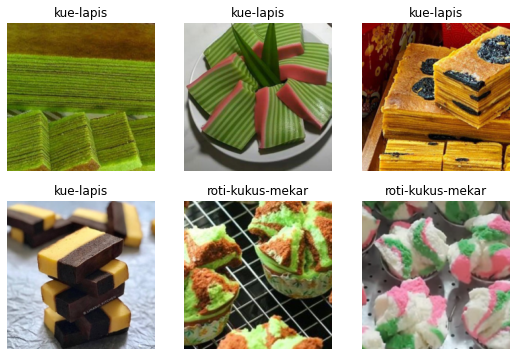

In [4]:
# Show a batch of data
dls.show_batch()

### Create the learner

In [5]:
# create the learner using vision_learner and resnet50 as pretrained model
# use error_rate as the metrics
learn = vision_learner(dls, resnet50, metrics=error_rate)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [6]:
# fine tune the pretrained model using dataset
learn.fine_tune(2)

epoch,train_loss,valid_loss,error_rate,time
0,0.614208,0.100121,0.105263,01:25


epoch,train_loss,valid_loss,error_rate,time
0,0.686720,0.003203,0.000000,01:46
1,0.536046,0.030030,0.000000,01:46


### Predict the some data

In this section, we will load some test data, and show the prediction result for some of the loaded data.

In [7]:
test_data = get_image_files(f'{path}/test')

In [8]:
print(test_data[0])
print(learn.predict(test_data[0]))

/content/drive/MyDrive/Colab_Notebooks/data/indonesian-food/test/lumpia/000014.jpg


('lumpia', TensorBase(1), TensorBase([5.7901e-07, 1.0000e+00, 4.0141e-06]))


In [9]:
print(test_data[7])
print(learn.predict(test_data[7]))

/content/drive/MyDrive/Colab_Notebooks/data/indonesian-food/test/roti-kukus-mekar/000024.jpg


('roti-kukus-mekar', TensorBase(2), TensorBase([1.9598e-04, 2.5171e-03, 9.9729e-01]))


In [10]:
print(test_data[15])
print(learn.predict(test_data[15]))

/content/drive/MyDrive/Colab_Notebooks/data/indonesian-food/test/kue-lapis/000028.jpg


('kue-lapis', TensorBase(0), TensorBase([9.9999e-01, 1.2138e-05, 9.0986e-08]))


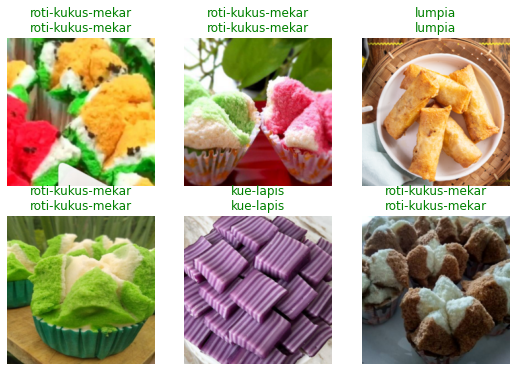

In [11]:
learn.show_results()

### Export the model

In [12]:
learn.export()

In [13]:
# reload the model
learn_inf = load_learner(path+'/export.pkl')
learn_inf.predict(test_data[15])

('kue-lapis', TensorBase(0), TensorBase([9.9999e-01, 1.2138e-05, 9.0986e-08]))